In [1]:
import numpy as np
from typing import *

from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector, Operator
from qiskit.visualization import plot_bloch_multivector
sim = AerSimulator()

from util import zero, one, demonstrate_measure, PlotGateOpOnBloch, plot_bloch_vector

# Foundations: Quantum Circuits for a Single Qubit System

In this notebook, we will introduce **quantum circuits** that act on single qubit system to perform computations in the **gate-based model of quantum computation**. Later, we will extend our definitions to cover multi-qubit quantum systems and multi-qubit quantum circuits.

References
1. [Introduction to Classical and Quantum Computing: Chapter 2](https://www.thomaswong.net/introduction-to-classical-and-quantum-computing-1e4p.pdf)

## Quantum Gates on a Single Qubit

Similar to how we could apply classical logic gates to classical bits to perform computation, we can apply quantum gates to qubits to perform quantum computation. We will introduce a few single qubit quantum gates now, starting with the **Pauli gates**.

### Pauli Gates: Rotations on the Bloch Sphere

As a reminder, the quantum state of a single qubit system can be encoded on a Bloch sphere. The **Pauli gates** are a set of 3 gates that encode rotations around the 3 axes of the Bloch sphere: $X$, $Y$, and $Z$. We'll cover these in turn now.

#### X Gate

The **X** gate performs a rotation around the $X$-axis of the Bloch sphere. It is similar to a logical negation.

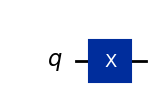

In [2]:
qc_x = QuantumCircuit(1)  # Create a quantum circuit with a single qubit
qc_x.x(0)                 # Apply an x gate to qubit 0
qc_x.draw(output="mpl", style="iqp")

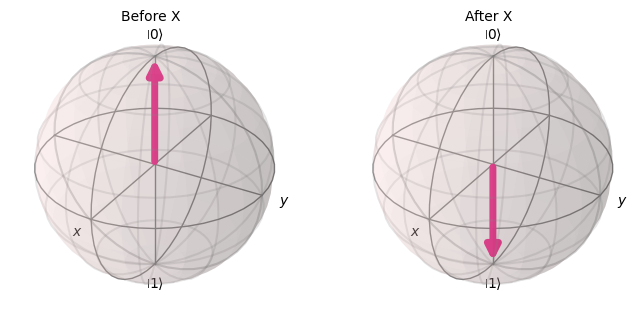

In [3]:
with PlotGateOpOnBloch() as ctx:
    plot_bloch_vector(zero, ax=ctx.ax1, title="Before X")
    plot_bloch_vector(zero.evolve(Operator(qc_x)), ax=ctx.ax2, title="After X")

#### Y Gate

The **Y** gate performs a rotation around the $Y$-axis of the Bloch sphere. It performs a flip and phase flip.

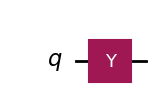

In [4]:
qc_y = QuantumCircuit(1)
qc_y.y(0)
qc_y.draw(output="mpl", style="iqp")

In [5]:
zero.evolve(Operator(qc_y)), one.evolve(Operator(qc_y))

(Statevector([0.+0.j, 0.+1.j],
             dims=(2,)),
 Statevector([0.-1.j, 0.+0.j],
             dims=(2,)))

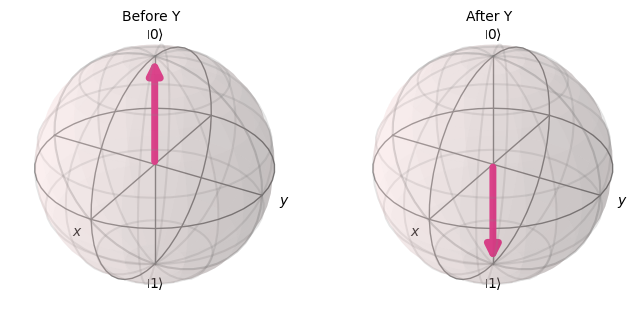

In [6]:
with PlotGateOpOnBloch() as ctx:
    plot_bloch_vector(zero, ax=ctx.ax1, title="Before Y")
    plot_bloch_vector(zero.evolve(Operator(qc_y)), ax=ctx.ax2, title="After Y")

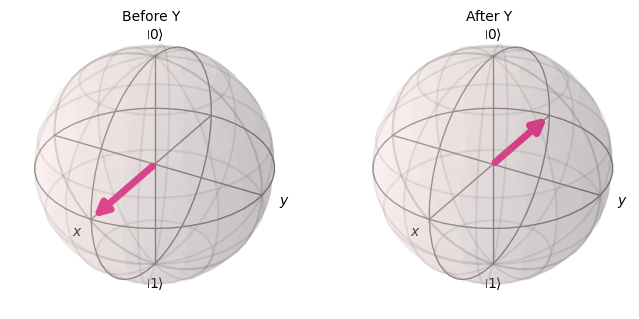

In [7]:
with PlotGateOpOnBloch() as ctx:
    q = 1/np.sqrt(2)*zero + 1/np.sqrt(2)*one
    plot_bloch_vector(q, ax=ctx.ax1, title="Before Y")
    plot_bloch_vector(q.evolve(Operator(qc_y)), ax=ctx.ax2, title="After Y")

#### Z Gate

The $Z$ gate performs a rotation around the $Z$ axis of the Bloch sphere. It performs a phase flip.

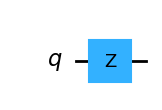

In [32]:
qc_z = QuantumCircuit(1)
qc_z.z(0)
qc_z.draw(output="mpl", style="iqp")

In [9]:
zero.evolve(Operator(qc_z)), one.evolve(Operator(qc_z))

(Statevector([1.+0.j, 0.+0.j],
             dims=(2,)),
 Statevector([ 0.+0.j, -1.+0.j],
             dims=(2,)))

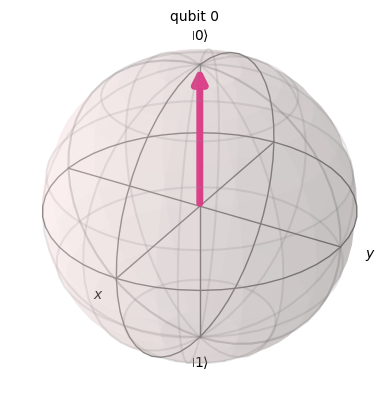

In [10]:
plot_bloch_multivector(zero.evolve(Operator(qc_z)))

### Hadamard Gate: Superposition

The **Hadamard gate**, written $H$, takes a $|0\rangle$ qubit and puts it in superposition. The $H$ gate is a commonly used gate in many quantum algorithms and protocols.

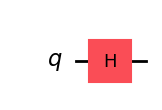

In [11]:
qc_h = QuantumCircuit(1)
qc_h.h(0)
qc_h.draw(output="mpl", style="iqp")

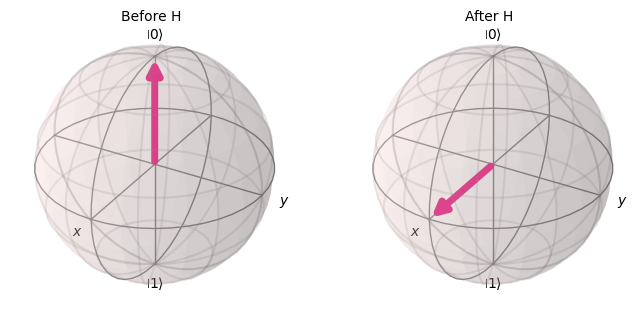

In [12]:
with PlotGateOpOnBloch() as ctx:
    plot_bloch_vector(zero, ax=ctx.ax1, title="Before H")
    plot_bloch_vector(zero.evolve(Operator(qc_h)), ax=ctx.ax2, title="After H")

## Quantum Circuits

1. As we have seen, a quantum gate translates a point on the Bloch sphere to another point on the Bloch sphere.
2. Since each point on the Bloch sphere encodes a quantum state, a quantum gate can be used to convert input quantum states into output quantum states. We will call a function from an input quantum state to an output quantum state a **quantum computation**.
3. By sequencing the applications of quantum gates to form a **quantum circuit**, we can perform more complex transformations.

### Example 1; H-Z

Here is an example quantum circuit that first applies an $H$ gate followed by a $Z$ gate. We read the circuit from left-to-right.

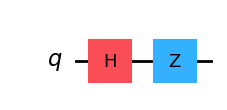

In [36]:
qc = QuantumCircuit(1)
qc.h(0)
qc.z(0)
qc.draw(output="mpl", style="iqp")

1. This quantum circuit first puts the qubit in superposition with the $H$ gate (north pole to positive $X$).
2. Then, we flip the phase with the $Z$ gate (positive $X$ to negative $X$).

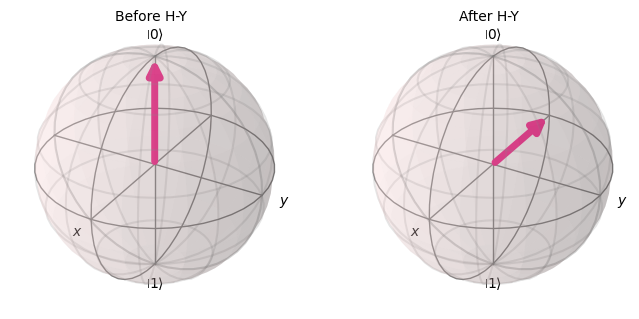

In [35]:
with PlotGateOpOnBloch() as ctx:
    plot_bloch_vector(zero, ax=ctx.ax1, title="Before H-Z")
    plot_bloch_vector(zero.evolve(Operator(qc)), ax=ctx.ax2, title="After H-Z")

### Example 2: Sequencing H Gates

We define a function that sequentially applies $H$ gates. The output quantum state from a previous application of a H can be fed as the input to the next $H$.

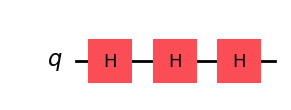

In [37]:
def seq_H(n: int) -> QuantumCircuit:
    qc = QuantumCircuit(1)
    for i in range(n):
        qc.h(0)
    return qc

qc2 = seq_H(3)
qc2.draw(output="mpl", style="iqp")

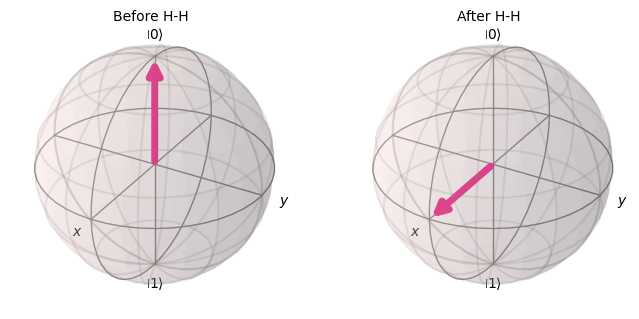

In [38]:
with PlotGateOpOnBloch() as ctx:
    plot_bloch_vector(zero, ax=ctx.ax1, title="Before H-H")
    plot_bloch_vector(zero.evolve(Operator(qc2)), ax=ctx.ax2, title="After H-H")

Notice that the application of 2 H gates acted like a noop, i.e, it did not affect the quantum state. We'll check 3 $H$ gates now.

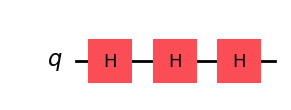

In [39]:
qc3 = seq_H(3)
qc3.draw(output="mpl", style="iqp")

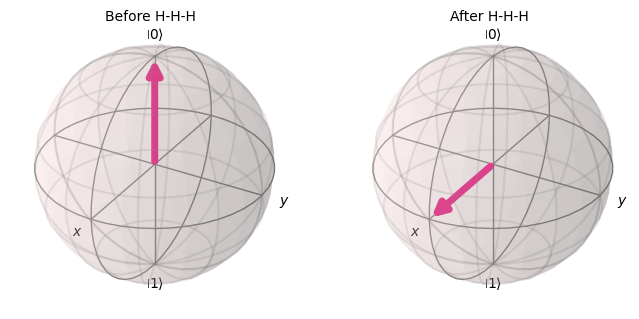

In [40]:
with PlotGateOpOnBloch() as ctx:
    plot_bloch_vector(zero, ax=ctx.ax1, title="Before H-H-H")
    plot_bloch_vector(zero.evolve(Operator(qc3)), ax=ctx.ax2, title="After H-H-H")

### Observation: Non-Uniqueness

1. We observed that applying 3 $H$ gates in a row produced the same operator as a single $H$ gate.
2. Thus there are many quantum circuits that perform the same quantum computation. In other words, a quantum circuit performs a non-unique quantum computation.

## Summary

1. We saw that an operation on a single qubit systems can be implemented by a quantum gate that performs transformations on Bloch spheres.
2. We reviewed important single qubit gates, including the Pauli gates and the Hadamard gate.